In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sys

from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pd.set_option("display.max_columns", None)

In [34]:
root_path = str(Path.cwd().parent)
if root_path not in sys.path:
    sys.path.append(root_path)

from utils import preencher_nulos
from utils import formatar_eixo_ano

In [35]:
df = pd.read_parquet("../arquivos_parquet/dados_base.parquet")
df

,Close,High,Low,Open,Volume,Variacao,Var%
Date,,,,,,,
2022-01-03,12.387834,12.579596,12.170503,12.330305,1461343,NaN,NaN
2022-01-04,12.662698,12.688265,12.368662,12.368662,1115778,0.274864,2.218824
2022-01-05,12.407012,12.726615,12.387835,12.643517,984350,-0.255686,-2.019205
2022-01-06,12.630739,12.656308,12.368665,12.598780,2113838,0.223727,1.803232
2022-01-07,12.828891,12.848067,12.438973,12.681873,1116684,0.198152,1.568804
...,...,...,...,...,...,...,...
2025-12-22,35.335915,35.568706,35.258320,35.462010,1940108,-0.126095,-0.355577
2025-12-23,35.743301,35.849998,35.403813,35.549307,889817,0.407387,1.152897
2025-12-26,36.016346,36.056310,35.666674,35.816532,554500,0.273045,0.763904


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2022-01-03 to 2025-12-30
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     999 non-null    float64
 1   High      999 non-null    float64
 2   Low       999 non-null    float64
 3   Open      999 non-null    float64
 4   Volume    999 non-null    int64  
 5   Variacao  998 non-null    float64
 6   Var%      998 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 62.4 KB


In [37]:
col_nulo = ["Variacao", "Var%"]

df = preencher_nulos(df, col_nulo, 0)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,999.0,20.134537,6.014169,12.360322,14.835429,19.757906,23.461494,3.631607e+01
High,999.0,20.318123,6.047612,12.398887,15.008589,19.893753,23.677173,3.667573e+01
Low,999.0,19.936897,5.967382,12.122500,14.670840,19.639427,23.269132,3.601635e+01
Open,999.0,20.118871,6.005802,12.330305,14.815571,19.754492,23.488877,3.613718e+01
Volume,999.0,723664.808809,471599.261821,122364.000000,436827.500000,602416.000000,870766.500000,4.956875e+06
Variacao,999.0,0.023952,0.260466,-1.441841,-0.123316,0.017796,0.164772,1.326290e+00
Var%,999.0,0.115973,1.287267,-5.096307,-0.639572,0.095002,0.844378,6.547328e+00


In [39]:
inicio = df.index.min()
fim = df.index.max()

print(f"Data inicial: {inicio}")
print(f"Data final: {fim}")

Data inicial: 2022-01-03 00:00:00
Data final: 2025-12-30 00:00:00


In [40]:
plt.rcParams["figure.figsize"] = (
    12,
    6,
)  # Tamanho padrão para todos os gráficos
plt.rcParams["axes.grid"] = True  # Ativa grade em todos
plt.rcParams["grid.alpha"] = 0.3  # Transparência da grade
plt.rcParams["axes.titlesize"] = 14  # Tamanho da fonte do título

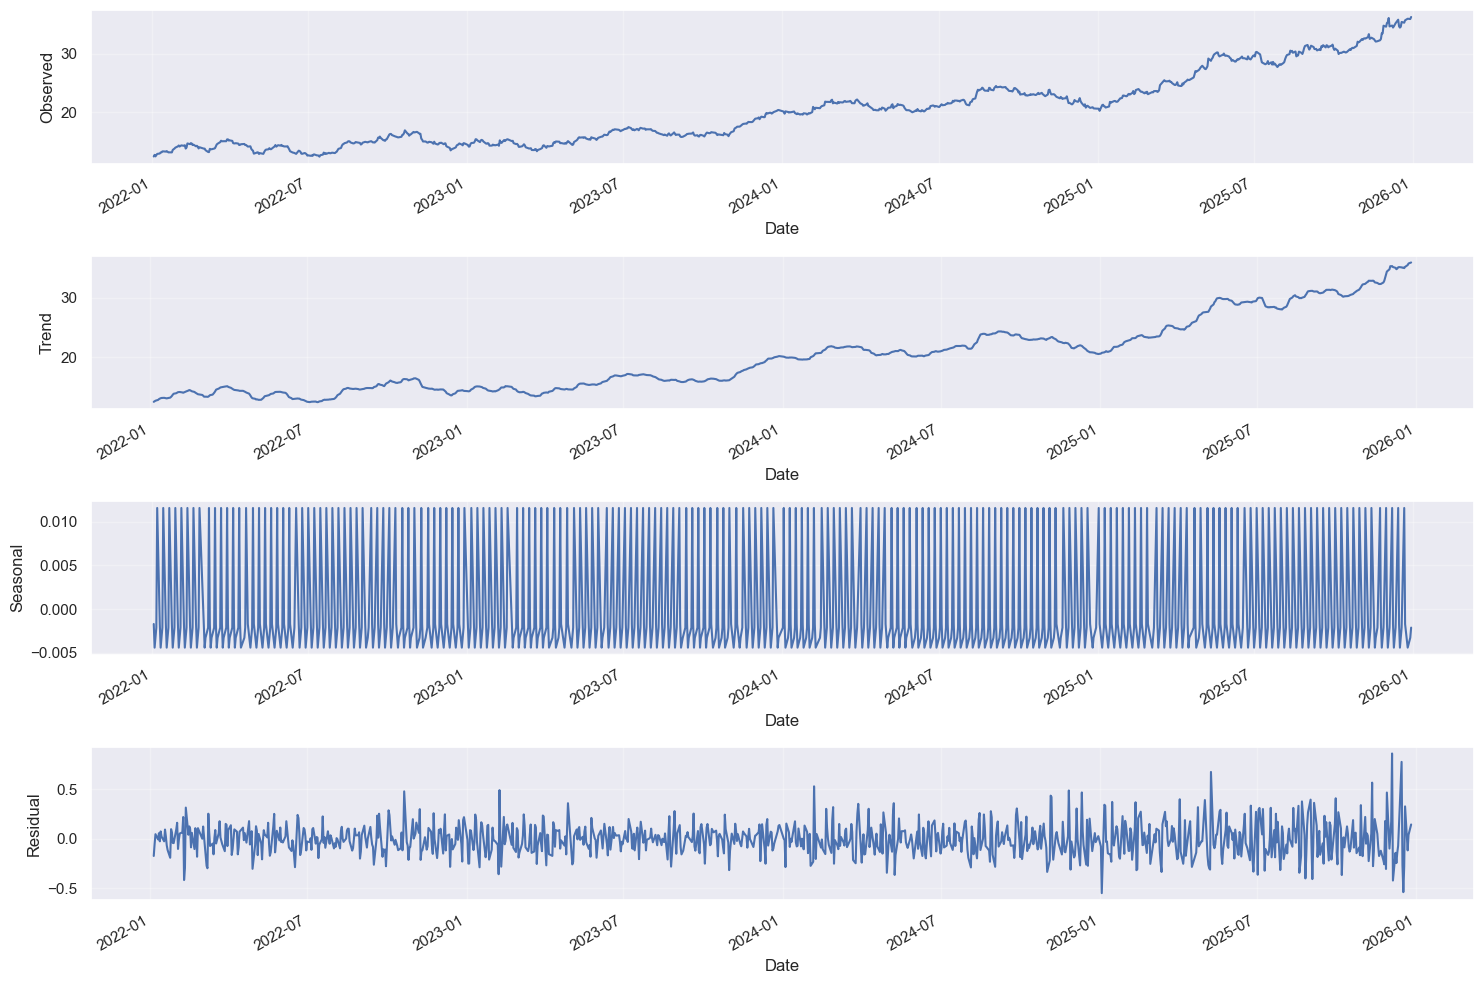

In [41]:
# Decomposição da série temporal
result = seasonal_decompose(df["Close"], model="additive", period=5)

# Plotando os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel("Observed")
result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel("Trend")
result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel("Seasonal")
result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel("Residual")
plt.tight_layout()
plt.show()

In [68]:
resultado = adfuller(df["Var%"])
print(f"ADF Statistic: {resultado[0]}")
print(f"p-valor: {resultado[1]}")
print("Critical Values:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -30.596388167189964
p-valor: 0.0
Critical Values:
   1%: -3.4369193380671
   5%: -2.864440383452517
   10%: -2.56831430323573


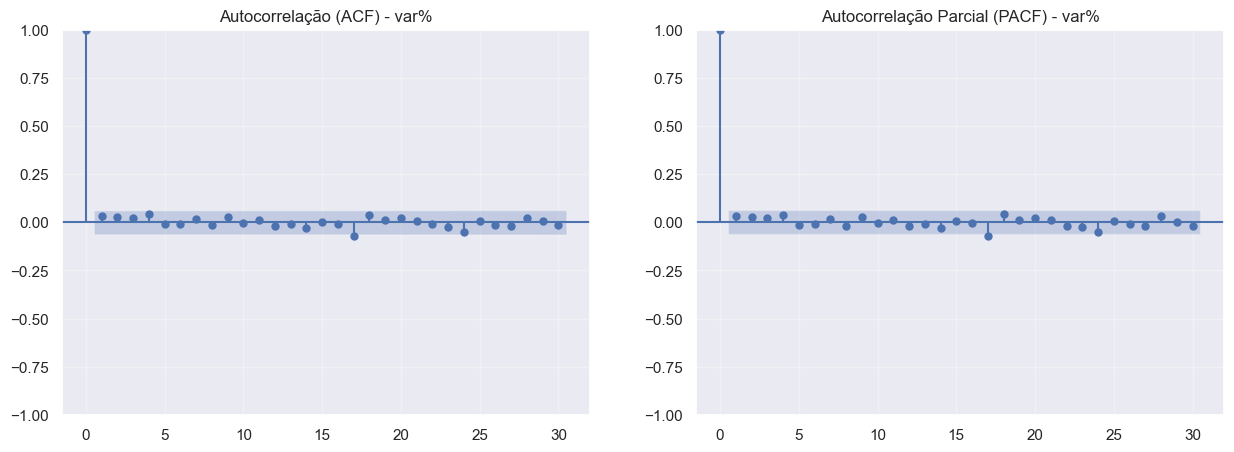

In [70]:
# Criando o ambiente para os dois gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ACF: Mostra a correlação direta e indireta
plot_acf(df["Var%"], lags=30, ax=ax1)
ax1.set_title("Autocorrelação (ACF) - var%")

# PACF: Mostra apenas a correlação direta (essencial para LSTM)
plot_pacf(df["Var%"], lags=30, ax=ax2)
ax2.set_title("Autocorrelação Parcial (PACF) - var%")

plt.show()

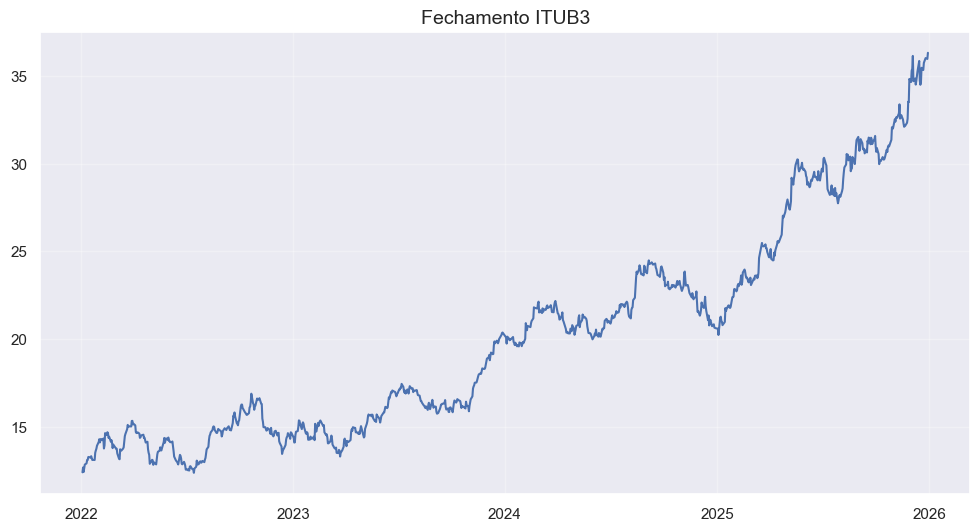

In [42]:
fig, ax = plt.subplots()
ax.plot(df["Close"])

formatar_eixo_ano(ax)

ax.set_title("Fechamento ITUB3")
plt.show()

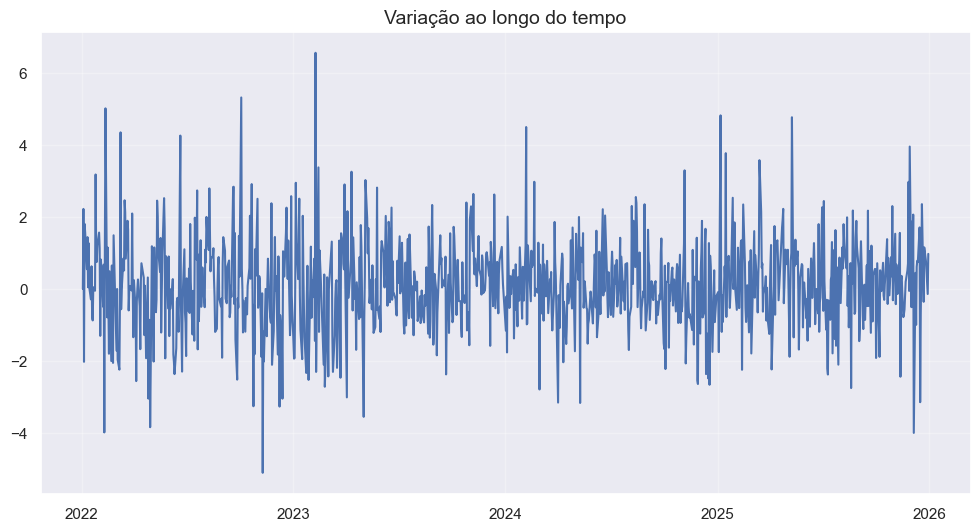

In [43]:
fig, ax = plt.subplots()
ax.plot(df["Var%"])

formatar_eixo_ano(ax)

ax.set_title("Variação ao longo do tempo")
plt.show()

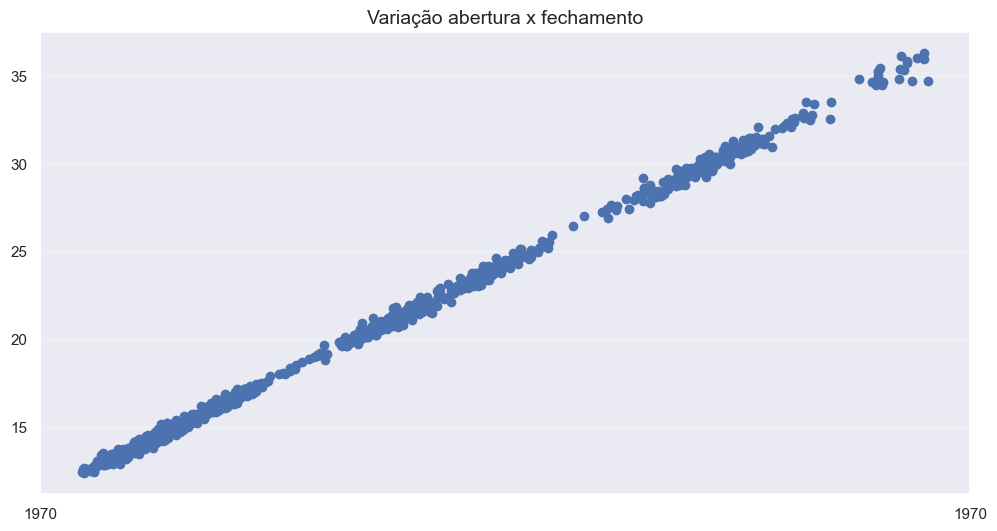

In [44]:
fig, ax = plt.subplots()
ax.scatter(df["Open"], df["Close"])

formatar_eixo_ano(ax)

ax.set_title("Variação abertura x fechamento")
plt.show()

array([[<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Variacao'}>],
       [<Axes: title={'center': 'Var%'}>, <Axes: >, <Axes: >]],
      dtype=object)

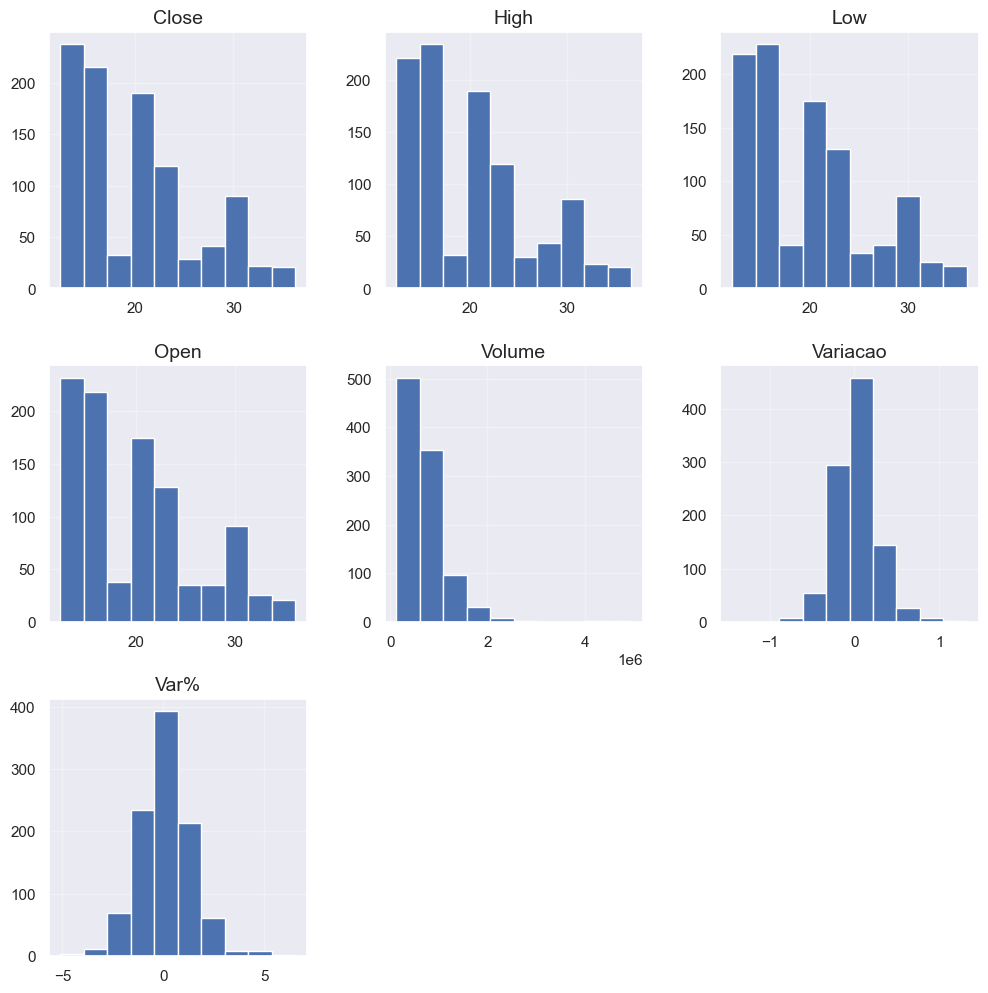

In [45]:
df.hist(figsize=(12, 12))

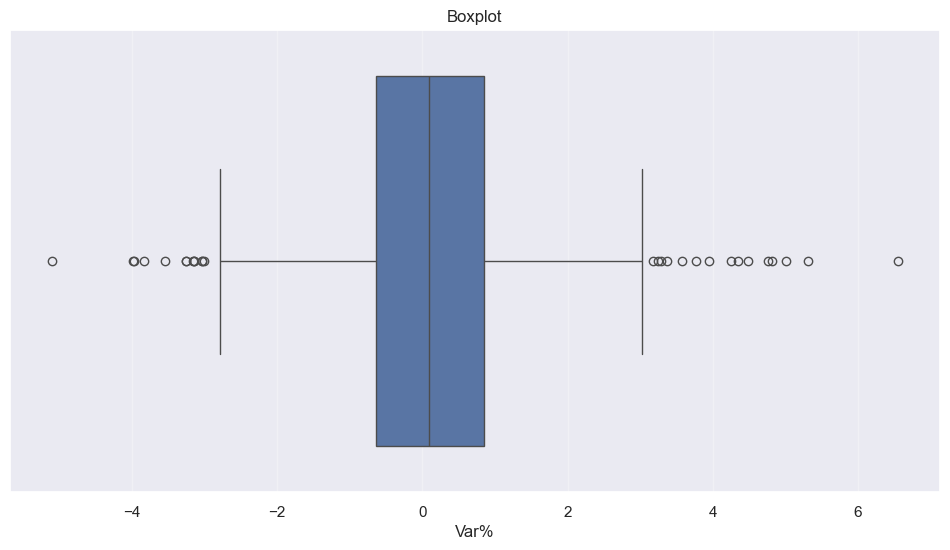

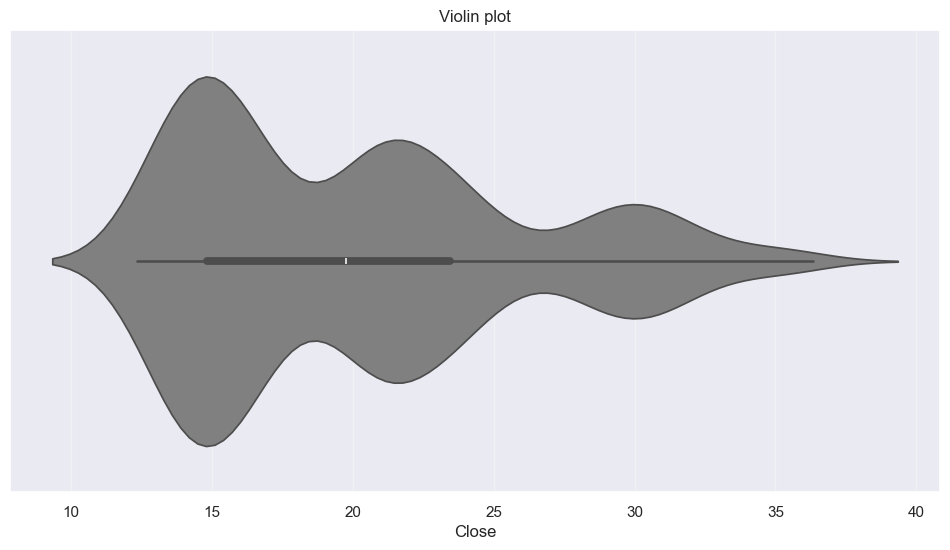

In [46]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Var%", data=df)
axes.set_title("Boxplot")
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
sns.violinplot(x="Close", data=df, color="gray")
axes.set_title("Violin plot")
plt.show()

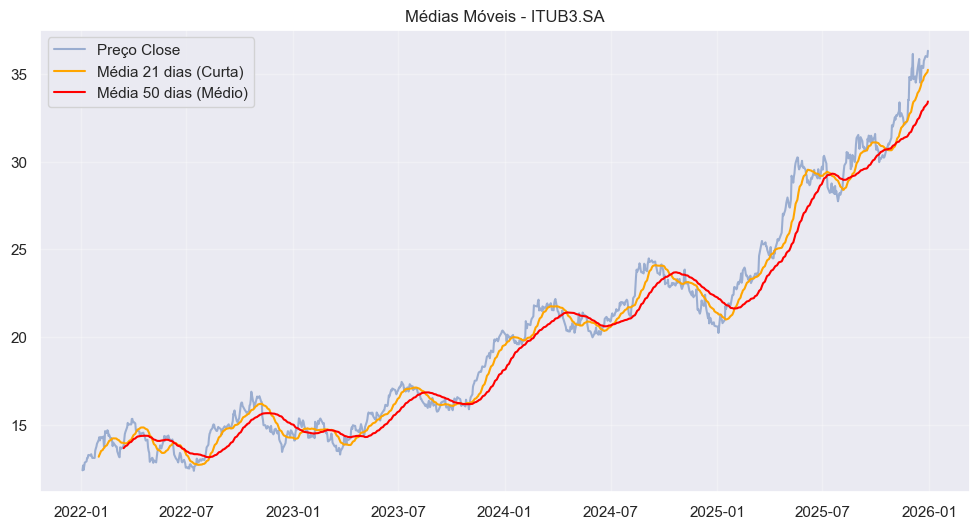

In [ ]:
df["MA21"] = df["Close"].rolling(window=21).mean()  # 1 Mês
df["MA50"] = df["Close"].rolling(window=50).mean()  # 1 Trimestre


# Plotando
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Preço Close", alpha=0.5)
plt.plot(df["MA21"], label="Média 21 dias (Curta)", color="orange")
plt.plot(df["MA50"], label="Média 50 dias (Médio)", color="red")
plt.title("Médias Móveis - ITUB3.SA")
plt.legend()
plt.show()